# Name: Nausheen Majeed, Roll no.: PIAIC156602
Pandas Assign#1

In [96]:
import numpy as np
import pandas as pd

Part 1: US Census Data

In [98]:
'''
args: s will be a df column, r will be char to remove
return: the df column with sign removed
'''
def clean_data(s, r):
    return s.replace(to_replace=r, value='', regex=True)

'''
args: s will be a df column
return: the df column after converting it into numeric
'''

def convert_data(s):
    return s.apply(pd.to_numeric)



In [99]:
#Step 1: Using glob, read all file and then concatenate them in 'us_census'

import glob as g
census_files = sorted(g.glob('./states*.csv'))
#census_files
us_census = pd.concat((pd.read_csv(file).assign(filename = file)
         for file in census_files), ignore_index = True)


In [100]:
#Step2: working on column types
us_census.head(n=10)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,filename
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F,.\states0.csv
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F,.\states0.csv
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F,.\states0.csv
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F,.\states0.csv
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F,.\states0.csv
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F,.\states0.csv
6,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F,.\states1.csv
7,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F,.\states1.csv
8,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F,.\states1.csv
9,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F,.\states1.csv


In [101]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'filename'],
      dtype='object')

In [102]:
#use regex to convert income column into numerical type
us_census['Income'] = clean_data(us_census['Income'], '[$]')
us_census['Income'] = convert_data(us_census['Income'])


In [104]:
#separate GenderProp column:- separate it into Men and Women column

us_census = us_census.join(us_census['GenderPop'].str.split('_', 1, expand=True).rename(columns={0:'Men', 1:'Women'}))


In [105]:
#convert both columns into numerical type. M or F char to no.

us_census['Men'] = clean_data(us_census['Men'], '[M]')
us_census['Men'] = convert_data(us_census['Men'])

us_census['Women'] = clean_data(us_census['Women'], '[F]')
us_census['Women'] = convert_data(us_census['Women'])

In [113]:
#us_census.head()
#us_census['Men'].dtype  # to check: why its type is int64 wheres F type is flot64


In [114]:
#additionl processing by me: dropped column Unnamed and column GenderProp, also re-order the columns:

us_census = us_census.reindex(columns=['State','Income', 'Men', 'Women','TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'])


In [115]:
#Step 7: 
#Checking how many nan values
#us_census['Women'].isnull()   #index: 23,24, 31
us_census['Women'].isnull().sum() #print column with the no. of women per state to see NaN values


3

In [116]:
#Use fillna function. How to fill: TotalPop - Men per state

#to verify: 
#us_census.loc[23,'Women'] = 3057895 , us_census.loc[24,'Women']=3057895, #us_census.loc[31,'Women'] = 504536
#us_census.loc[31,'TotalPop'] - us_census.loc[31,'Men']

us_census['Women'].fillna(us_census['TotalPop'] - us_census['Men'], inplace=True)  
us_census['Women'].isnull().sum() 

0

In [117]:
# Step 8: Use .duplicated on census df. Then use drop_duplicated() to drop all those values.
us_census.duplicated().sum()

9

In [118]:
#us_census.drop_duplicates(inplace=True).reset_index(drop=True)  #Use it to reset all indexes
us_census.drop_duplicates(inplace=True)
us_census.duplicated().sum()

0

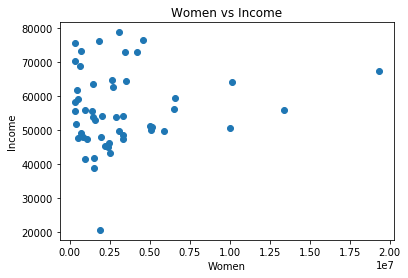

In [119]:
#Step 9: Use matplotlib to make a scatterplot!

import matplotlib.pyplot as plt
plt.scatter(us_census['Women'], us_census['Income'])
plt.title("Women vs Income")
plt.xlabel("Women")
plt.ylabel("Income")
plt.show()

In [121]:
#Step 10: Histogram for races:

# look what the race data is: 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', iloc: 5-10

# get the data into numerical form (without %sign)
for i in range(5,11):
    us_census.iloc[:,i] = clean_data(us_census.iloc[:,i],'[%]')
    us_census.iloc[:,i] = convert_data(us_census.iloc[:,i])


In [140]:
# fill nan values

#first check how many nan values in Race data:
emp = {}
for i in range(5,11):
    emp[i] = us_census.iloc[:,i].isnull().sum()
    
emp

{5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 4}

In [162]:
#Only Pacific has 4 null values
#strategy to fillna: 100 - sum of all other percentages

us_census['Pacific'].fillna(100 - (us_census['Hispanic'] + us_census['White'] + us_census['Black'] + us_census['Native'] + us_census['Asian']), inplace=True)  
us_census['Pacific'].isnull().sum() 


0

In [169]:
#Unique states check
us_census['State'].nunique()  #51 states data

51

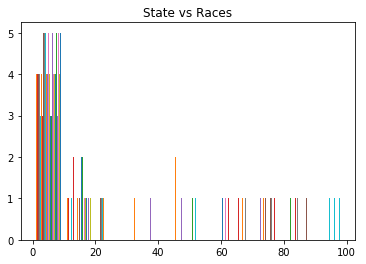

In [164]:
#Histogram of Races
plt.hist(us_census[['Hispanic', 'White', 'Black', 'Native','Asian','Pacific']])
plt.title("State vs Races")
plt.show()

##To verify if we need to plot histogram for every state?

Part 2: Petal Power Inventory - Answer emails of customers

In [170]:
# Step 1. load inventory.csv into df.
inventory = pd.read_csv('inventory.csv')

In [174]:
# Step 2. inspect first 10 rows of inventory
#inventory
inventory.head(n=10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [176]:
# Step 3. save these 10 rows into staten_island
staten_island = inventory.head(n=10)

In [177]:
# 4. Select the column product_description from staten_island and save it to the variable product_request [customer asked about producted sold]

product_request = staten_island['product_description']

In [199]:
#inventory

In [182]:
# 5.  types of seeds at Brooklyn location [another customer asked]
cond = (inventory['location'] == 'Brooklyn') & (inventory['product_type'] == 'seeds')
seeds_Brooklyn = inventory[cond].product_description
seeds_Brooklyn

10         daisy
11    calla lily
12        tomato
Name: product_description, dtype: object

In [190]:
# 6. Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

inventory['in_stock'] = np.where(inventory['quantity'] > 0, True, False)
#inventory

In [200]:
# 7. Create a column called total_value that is equal to price multiplied by quantity. [Petal Power wants to know how valuable their current inventory is.]

inventory['total_value'] = inventory['quantity'] * inventory['price'] 


In [197]:
# 8. The Marketing department wants a complete description of each product for their catalog.

# The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,             
                     row.product_description)
# Paste this function into script.py.

#Calling this function directly
# 9.
# Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.
inventory['full_description'] = inventory.apply(combine_lambda, axis=1)


In [198]:
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
